<a href="https://colab.research.google.com/github/jackhegarty3/Data110-Fall2025/blob/main/Data_110_Week_7_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

iris = sns.load_dataset('iris')
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


Text(0.5, 1, 'Pairplot of Iris Dataset')

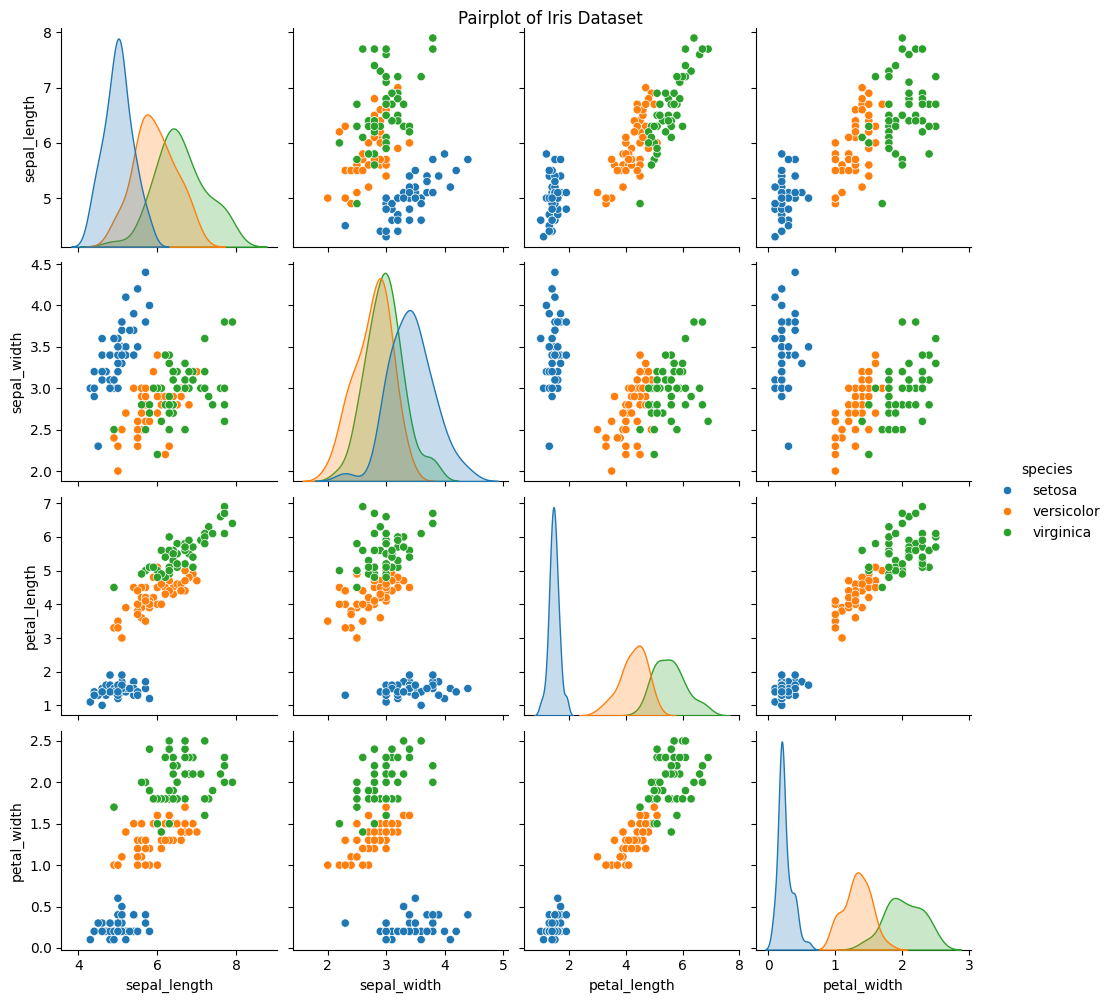

In [6]:
g = sns.pairplot(iris, hue="species", diag_kind="kde")
g.fig.suptitle("Pairplot of Iris Dataset", y=1)

Based on the above pairplot, a few insights become clear. First, petal length and petal width are closely correlated, but sepal length and sepal width are not. Second, petal length of the Setosa species is consistent regardless of other features. Lastly, sepal length is most strongly correlated with petal length, and sepal width isn't closely correlated with any other features.

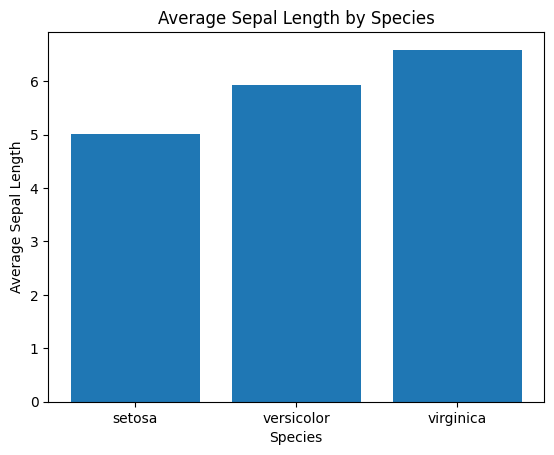

In [9]:
average_length = iris.groupby('species')['sepal_length'].mean()
plt.bar(average_length.index, average_length.values)
plt.title('Average Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Average Sepal Length')
plt.show()

This bar plot shows that the average sepal length is relatively similar across all species. However, Virginica is the only species with an average sepal length over 6.

Text(0, 0.5, 'Petal Width')

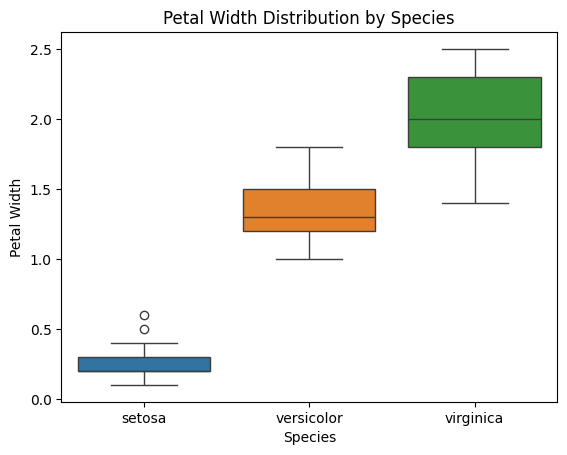

In [11]:
sns.boxplot(iris, x='species', y='petal_width', hue='species')
plt.title('Petal Width Distribution by Species')
plt.xlabel('Species')
plt.ylabel('Petal Width')

The above box plot shows that petal widths of the Setosa species are extremely consistent. Petal widths of the Virginica species are the most varying, and distribution of petal widths of the Versicolor species lies somewhere between the two.

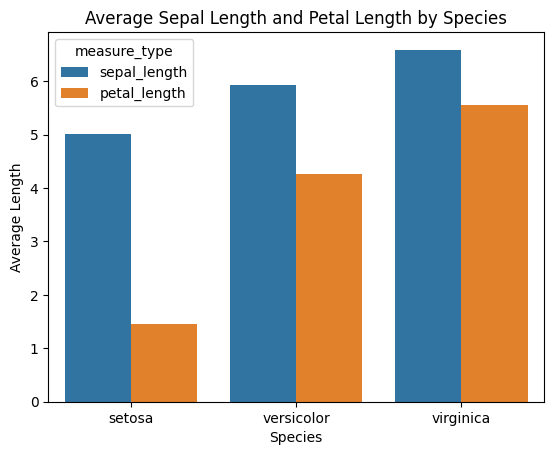

In [17]:
avg_lengths = (iris.groupby('species')[['sepal_length', 'petal_length']].mean().reset_index().melt(id_vars='species',var_name='measure_type',value_name='average_value'))

sns.barplot(x='species',y='average_value',hue='measure_type',data=avg_lengths)
plt.title('Average Sepal Length and Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Average Length')
plt.show()

The above grouped bar plot shows a relatively even relationship between the species in 5 of 6 variables, with Virginica being the largest, Versicolor being slightly smaller, and Setosa being slightly smaller than Versicolor. The exception is in the petal length of Setosa, which is significantly smaller than the other two species and its own sepal length.

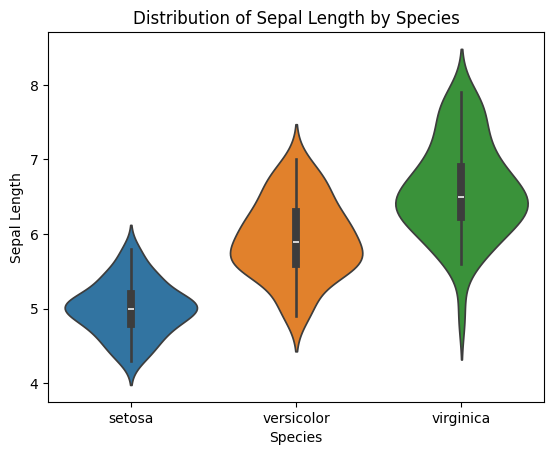

In [21]:
sns.violinplot(x='species', y='sepal_length', hue='species', data=iris)
plt.title('Distribution of Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length')
plt.show()

The above violin plot shows how widespread the distribution of sepal length is for each species. Sepal lengths of Setosa are the most consistent, while sepal lengths of Virginicia are the most varying.

In [19]:
species_stats = iris.groupby('species')[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].agg(['mean', 'min', 'max'])
display(species_stats)

species_counts = iris['species'].value_counts()
display(species_counts)

sepal_length           sepal_width           petal_length       \
                   mean  min  max        mean  min  max         mean  min   
species                                                                     
setosa            5.006  4.3  5.8       3.428  2.3  4.4        1.462  1.0   
versicolor        5.936  4.9  7.0       2.770  2.0  3.4        4.260  3.0   
virginica         6.588  4.9  7.9       2.974  2.2  3.8        5.552  4.5   

                petal_width            
            max        mean  min  max  
species                                
setosa      1.9       0.246  0.1  0.6  
versicolor  5.1       1.326  1.0  1.8  
virginica   6.9       2.026  1.4  2.5

,count
species,
setosa,50
versicolor,50
virginica,50


The above statistics show that the dataset has an equal number of samples for each species. They also show that Virginica and Versicolor sepals and petals are shaped similarly, with Virginica being slightly larger than Versicolor. Setosa, however, are shaped completely differently. Setosa's sepals are considerably wider while being slightly shorter, and Setosa's petals are significantly smaller than both other species.